In [ ]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [ ]:
#reading train.csv
traind= pd.read_csv("train.csv")

In [ ]:
traind.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [ ]:
traind.shape

(14999, 9)

In [ ]:
traind.dtypes

vidid        object
adview        int64
views        object
likes        object
dislikes     object
comment      object
published    object
duration     object
category     object
dtype: object

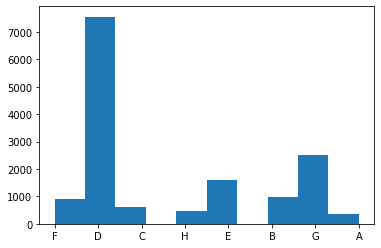

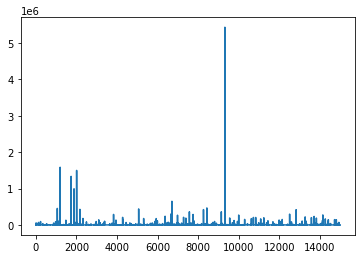

In [ ]:
#plotting data
plt.hist(traind["category"])
plt.show()
plt.plot(traind["adview"])
plt.show()

In [ ]:
# Removing character "F" present in data
traind=traind[traind.views!='F']
traind=traind[traind.likes!='F']
traind=traind[traind.dislikes!='F']
traind=traind[traind.comment!='F']
traind.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [ ]:
# Assigning each category a number for Category feature
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
traind["category"]=traind["category"].map(category)
traind.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


In [ ]:
traind = traind[traind["adview"] <2000000]

In [ ]:
traind.shape

(14636, 9)

In [ ]:
# Convert values to integers for views, likes, comments, dislikes and adview
traind["views"] = pd.to_numeric(traind["views"])
traind["comment"] = pd.to_numeric(traind["comment"])
traind["likes"] = pd.to_numeric(traind["likes"])
traind["dislikes"] = pd.to_numeric(traind["dislikes"])
traind["adview"]=pd.to_numeric(traind["adview"])
column_vidid=traind['vidid']
traind.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


In [ ]:
# Endoding features like Category, Duration, Vidid
from sklearn.preprocessing import LabelEncoder
traind['duration']=LabelEncoder().fit_transform(traind['duration'])
traind['vidid']=LabelEncoder().fit_transform(traind['vidid'])
traind['published']=LabelEncoder().fit_transform(traind['published'])
traind.head()


,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9004,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4


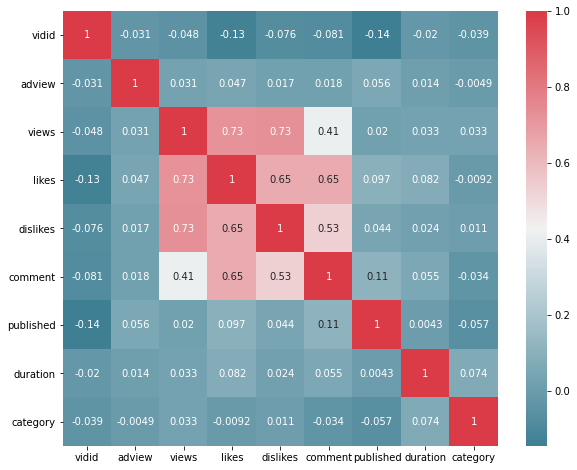

In [ ]:
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 8))
corr = traind.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
square=True, ax=ax,annot=True)
plt.show()

In [ ]:
import datetime
import time
def checki(x):
  y = x[2:]
  h = ''
  m = ''
  s = ''
  mm = ''
  P = ['H','M','S']
  for i in y:
    if i not in P:
      mm+=i
    else:
      if(i=="H"):
        h = mm
        mm = ''
      elif (i == "M"):
        m = mm
        mm = ''
      else:
        s = mm
        mm = ''
  if (h==''):
    h = '00'
  if (m == ''):
    m = '00'
  if (s==''):
    s='00'
  bp = h+':'+m+':'+s
  return bp
mp = pd.read_csv("train.csv")["duration"]
time = mp.apply(checki)
def func_sec(time_string):
  h, m, s = time_string.split(':')
  return int(h) * 3600 + int(m) * 60 + int(s)
time1=time.apply(func_sec)
traind["duration"]=time1
traind.head()


,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,457,6
1,2741,2,1707,56,2,6,2185,570,4
2,8138,1,2023,25,0,2,2094,136,3
3,9004,6,620860,777,161,153,2119,262,8
4,122,1,666,1,0,0,2091,31,4


In [ ]:
# Split Data
Y_train = pd.DataFrame(data = traind.iloc[:, 1].values, columns = ['target'])
traind=traind.drop(["adview"],axis=1)
traind=traind.drop(["vidid"],axis=1)
traind.head()

,views,likes,dislikes,comment,published,duration,category
0,1031602,8523,363,1095,2168,457,6
1,1707,56,2,6,2185,570,4
2,2023,25,0,2,2094,136,3
3,620860,777,161,153,2119,262,8
4,666,1,0,0,2091,31,4


In [ ]:
Y_train

,target
0,40
1,2
2,1
3,6
4,1
...,...
14631,2
14632,1
14633,4
14634,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(traind, Y_train, test_size=0.2, random_state=42)
X_train.shape
# Normalise Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
X_train.mean()

0.1739096800320488

In [ ]:
# Evaluation Metrics
from sklearn import metrics
def print_error(X_test, y_test, model_name):
  prediction = model_name.predict(X_test)
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

In [ ]:
# Linear Regression
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
print_error(X_test,y_test, linear_regression)

Mean Absolute Error: 3707.378005824532
Mean Squared Error: 835663131.1210337
Root Mean Squared Error: 28907.83857573986


In [ ]:
# Support Vector Regressor
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train,y_train)
print_error(X_test,y_test, linear_regression)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error: 3707.378005824532
Mean Squared Error: 835663131.1210337
Root Mean Squared Error: 28907.83857573986


In [ ]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
print_error(X_test,y_test, decision_tree)

Mean Absolute Error: 2581.438183060109
Mean Squared Error: 884393703.8350409
Root Mean Squared Error: 29738.757604093702


In [ ]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
n_estimators = 80
max_depth = 10
min_samples_split=10
min_samples_leaf=2
random_forest = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split=min_samples_split)
random_forest.fit(X_train,y_train)
print_error(X_test,y_test, random_forest)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Mean Absolute Error: 3019.119750791209
Mean Squared Error: 582505080.5286189
Root Mean Squared Error: 24135.142024206507


In [ ]:
# Artificial Neural Network
import keras
from keras.layers import Dense
ann = keras.models.Sequential([
Dense(6, activation="relu",
input_shape=X_train.shape[1:]),
Dense(6,activation="relu"),
Dense(1)
])
optimizer=keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])

In [ ]:
history=ann.fit(X_train,y_train,epochs=100)
ann.summary()
print_error(X_test,y_test,ann)

Epoch 1/100
366/366 [==============================] - 14s 1ms/step - loss: 1020697332.9908 - mean_squared_error: 1020697332.9908
Epoch 2/100
366/366 [==============================] - 0s 1ms/step - loss: 449512932.8992 - mean_squared_error: 449512932.8992
Epoch 3/100
366/366 [==============================] - 0s 1ms/step - loss: 402648973.4659 - mean_squared_error: 402648973.4659
Epoch 4/100
366/366 [==============================] - 0s 1ms/step - loss: 780562095.3592 - mean_squared_error: 780562095.3592
Epoch 5/100
366/366 [==============================] - 0s 1ms/step - loss: 535987665.5362 - mean_squared_error: 535987665.5362
Epoch 6/100
366/366 [==============================] - 0s 1ms/step - loss: 426690345.6611 - mean_squared_error: 426690345.6611
Epoch 7/100
366/366 [==============================] - 0s 1ms/step - loss: 481108708.9918 - mean_squared_error: 481108708.9918
Epoch 8/100
366/366 [==============================] - 0s 1ms/step - loss: 506320696.2589 - mean_squared_err

In [165]:
#Saving Scikitlearn models
import joblib
joblib.dump(decision_tree, "decisiontree_youtubeadview.pkl")

['decisiontree_youtubeadview.pkl']

In [ ]:
# Saving Keras Artificial Neural Network model
ann.save("ann_youtubeadview.h5")

In [ ]:
#reading test.csv
testd= pd.read_csv("test.csv")

In [ ]:
testd.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [ ]:
testd.shape

(8764, 8)

In [ ]:
testd.dtypes

vidid        object
views        object
likes        object
dislikes     object
comment      object
published    object
duration     object
category     object
dtype: object

In [ ]:
# Removing character "F" present in data
testd=testd[testd.views!='F']
testd=testd[testd.likes!='F']
testd=testd[testd.dislikes!='F']
testd=testd[testd.comment!='F']
testd.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [ ]:
# Assigning each category a number for Category feature
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
testd["category"]=testd["category"].map(category)
testd.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,2
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,6
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,4
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,7
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,2


In [ ]:
# Convert values to integers for views, likes, comments, dislikes and adview
testd["views"] = pd.to_numeric(testd["views"])
testd["comment"] = pd.to_numeric(testd["comment"])
testd["likes"] = pd.to_numeric(testd["likes"])
testd["dislikes"] = pd.to_numeric(testd["dislikes"])
column_vidid=testd['vidid']
testd.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,2
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,6
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,4
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,7
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,2


In [ ]:
# Endoding features like Category, Duration, Vidid
from sklearn.preprocessing import LabelEncoder
testd['duration']=LabelEncoder().fit_transform(testd['duration'])
testd['vidid']=LabelEncoder().fit_transform(testd['vidid'])
testd['published']=LabelEncoder().fit_transform(testd['published'])
testd.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,2115,2
1,3444,1040132,8171,340,1047,1825,2055,6
2,1593,28534,31,11,1,1009,1506,4
3,3775,1316715,2284,250,274,116,2265,7
4,7644,1893173,2519,225,116,1892,1625,2


In [ ]:
import datetime
import time
def checki(x):
  y = x[2:]
  h = ''
  m = ''
  s = ''
  mm = ''
  P = ['H','M','S']
  for i in y:
    if i not in P:
      mm+=i
    else:
      if(i=="H"):
        h = mm
        mm = ''
      elif (i == "M"):
        m = mm
        mm = ''
      else:
        s = mm
        mm = ''
  if (h==''):
    h = '00'
  if (m == ''):
    m = '00'
  if (s==''):
    s='00'
  bp = h+':'+m+':'+s
  return bp
mp= pd.read_csv("test.csv")["duration"]
time= mp.apply(checki)
def func_sec(time_string):
  h, m, s = time_string.split(':')
  return int(h) * 3600 + int(m) * 60 + int(s)
time=time.apply(func_sec)
testd["duration"]=time1
testd.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,457,2
1,3444,1040132,8171,340,1047,1825,570,6
2,1593,28534,31,11,1,1009,136,4
3,3775,1316715,2284,250,274,116,262,7
4,7644,1893173,2519,225,116,1892,31,2


In [ ]:
testd=testd.drop(["vidid"],axis=1)

In [ ]:
x = pd.DataFrame(data=testd[:])

In [ ]:
x

,views,likes,dislikes,comment,published,duration,category
0,440238,6153,218,1377,2053,457,2
1,1040132,8171,340,1047,1825,570,6
2,28534,31,11,1,1009,136,4
3,1316715,2284,250,274,116,262,7
4,1893173,2519,225,116,1892,31,2
...,...,...,...,...,...,...,...
8759,111205,471,14,101,231,274,3
8760,1074457,1024,195,65,1800,231,4
8761,1891692,4606,1109,191,1823,688,6
8762,714859,1639,151,382,1728,696,4


In [ ]:
from sklearn.preprocessing import MinMaxScaler
x=scaler.fit_transform(x)

In [ ]:
x

array([[1.95520958e-03, 1.92237996e-02, 6.05168920e-03, ...,
        9.75296912e-01, 1.07994423e-02, 1.42857143e-01],
       [4.61965571e-03, 2.55286311e-02, 9.43841435e-03, ...,
        8.66983373e-01, 1.34697639e-02, 7.14285714e-01],
       [1.26614645e-04, 9.68532080e-05, 3.05360464e-04, ...,
        4.79334917e-01, 3.21383841e-03, 4.28571429e-01],
       ...,
       [8.40188347e-03, 1.43905121e-02, 3.07858868e-02, ...,
        8.66033254e-01, 1.62582414e-02, 7.14285714e-01],
       [3.17494650e-03, 5.12072284e-03, 4.19176637e-03, ...,
        8.20902613e-01, 1.64472907e-02, 4.28571429e-01],
       [2.34068537e-05, 3.74915644e-05, 2.77600422e-05, ...,
        9.48218527e-01, 1.21464187e-02, 4.28571429e-01]])

In [166]:
#loading random forest into model 
model=joblib.load('decisiontree_youtubeadview.pkl')

In [167]:
prediction = model.predict(x)

In [168]:
prediction=pd.DataFrame(prediction)

In [169]:
prediction = prediction.rename(columns={0: "Adview"})

In [170]:
prediction.head()

,Adview
0,16.0
1,2.0
2,1.0
3,1.0
4,225.0


In [171]:
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8549 entries, 0 to 8548
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Adview  8549 non-null   float64
dtypes: float64(1)
memory usage: 66.9 KB


In [172]:
prediction.to_csv('predictions.csv')

In [173]:
#using deep learning (just for practice)
from keras.models import load_model
model_dl = load_model("ann_youtubeadview.h5")

In [179]:
#(just for practice deep learning)
prediction_dl = model_dl.predict(x)

In [180]:
#(just for practice deep learning)
prediction_dl=pd.DataFrame(prediction_dl)

In [181]:
#(just for practice deep learning)
prediction_dl= prediction_dl.rename(columns={0: "Adview"})

In [182]:
#(just for practice deep learning)
prediction_dl.head()

,Adview
0,1790.412354
1,2164.712402
2,1650.204102
3,1685.614624
4,1752.360718


In [184]:
#(just for practice deep learning)
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8549 entries, 0 to 8548
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Adview  8549 non-null   float64
dtypes: float64(1)
memory usage: 66.9 KB


decision tree has the less error so it give the accurate results, so i stored the result of decision tree model into predictions.csv file